In [24]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [34]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

In [35]:
print("X train: ",xtrain.shape) 
print("X test: ",xtest.shape) 

X train:  (50000, 32, 32, 3)
X test:  (10000, 32, 32, 3)


In [36]:
# ImageClasses = [0,1,2,3,4,5,6,7,8,9] // 10 classes
ImageClasses = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [37]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [39]:
ytest = ytest.reshape(-1,)

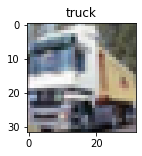

In [42]:
# image display function
def ImageShow(X,Y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(X[index])
  plt.title(ImageClasses[Y[index]])
ImageShow(xtrain,ytrain,1)

In [30]:
xtrain = xtrain / 255.0
ytrain = ytrain / 255.0




In [ ]:
CNNmodel = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
CNNmodel.compile( optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])


In [67]:
CNNmodel.fit(xtrain,ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6997 - accuracy: 0.7610
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6204 - accuracy: 0.7868
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.5731 - accuracy: 0.8017
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5320 - accuracy: 0.8172
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4792 - accuracy: 0.8331
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4421 - accuracy: 0.8456
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4304 - accuracy: 0.8523
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4020 - accuracy: 0.8620
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3785 - accuracy: 0.8707
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.347

In [68]:
CNNmodel.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.9926 - accuracy: 0.6153


[1.9926437139511108, 0.6152999997138977]

In [69]:
ypredict = CNNmodel.predict(xtest)
ypredict[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.70741641e-05, 2.44582965e-10, 7.16478053e-06, 9.91110802e-01,
        9.16266103e-08, 6.89710351e-03, 1.45924378e-06, 6.88891816e-07,
        1.96538353e-03, 1.69068983e-07],
       [7.94491917e-02, 2.07709218e-05, 1.87003337e-08, 1.57153557e-09,
        1.68610557e-12, 7.81631426e-10, 1.58978011e-07, 2.57231153e-10,
        9.12648141e-01, 7.88171869e-03],
       [1.65780336e-01, 1.31984934e-01, 2.29714508e-03, 2.74981325e-03,
        1.40964330e-04, 1.82853866e-04, 3.05070821e-03, 3.47722671e-04,
        6.78368509e-01, 1.50970835e-02],
       [9.99930143e-01, 5.52054402e-10, 3.97819422e-05, 2.91671910e-07,
        4.13612241e-07, 3.10504712e-11, 4.91398566e-08, 1.29424561e-05,
        1.63738769e-05, 1.99822114e-08],
       [2.77247159e-09, 9.40022904e-09, 6.54494949e-03, 1.30571082e-01,
        1.22405335e-01, 4.27237719e-05, 7.40435064e-01, 6.92112224e-07,
        1.34480175e-07, 3.96834565e-09]], dtype=float32)

In [70]:

yClasses = [np.argmax(yClass) for yClass in ypredict]
yClasses[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

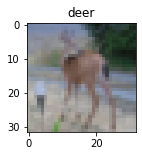

In [83]:
ImageShow(xtest,ytest,100)

In [84]:
ImageClasses[yClasses[100]]

'deer'